In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

# Progress bar
from tqdm.auto import trange, tqdm

In [2]:
import webbpsf_ext, pysiaf
from astropy.io import fits

In [3]:
import webbpsf_ext
from webbpsf_ext import image_manip, setup_logging, spectra, coords
from webbpsf_ext import miri_filter
from webbpsf_ext.coords import jwst_point, plotAxes    #class to setup pointing info
from webbpsf_ext.image_manip import pad_or_cut_to_size

In [4]:
# Mask information
mask_id = '1140'
filt = f'F{mask_id}C'
mask = f'FQPM{mask_id}'
pupil = 'MASKFQPM'

In [5]:
# Information necessary to create pysynphot spectrum of star
star_A_params = {
    'name': 'HD 141569 A', 
    'sptype': 'A2V', 
    'Teff': 10000, 'log_g': 4.28, 'metallicity': -0.5, # Merin et al. 2004
    'dist': 111.6,
    'flux': 64.02, 'flux_units': 'mJy', 'bp_ref': miri_filter('F1065C'),
    'RA_obj'  :  +237.49061772933,     # RA (decimal deg) of source
    'Dec_obj' :  -03.92120600474,      # Dec (decimal deg) of source
}



disk_params = {
    'file': "HD141569_3rings_10.65um.fits",
    'pixscale': 0.027491, 
    'wavelength': 10.65,
    'units': 'Jy/pixel',
    'dist' : 116,
    'cen_star' : True,
}

star_B_params = {
    'name': 'HD 141569 B', 
    'sptype': 'M5V', 
    'Teff': 3000, 'log_g': 4.28, 'metallicity': -0.5, # Merin et al. 2004
    'dist': 111.6,
    'flux': 34.22, 'flux_units': 'mJy', 'bp_ref': miri_filter('F1065C'),
    'RA_obj'  :  237.48904057555,     # RA (decimal deg) of source
    'Dec_obj' :  -03.91981148846,      # Dec (decimal deg) of source
}


star_C_params = {
    'name': 'HD 141569 C', 
    'sptype': 'M5V', 
    'Teff': 3000, 'log_g': 4.28, 'metallicity': -0.5, # Merin et al. 2004
    'dist': 111.6,
    'flux': 45.49, 'flux_units': 'mJy', 'bp_ref': miri_filter('F1065C'),
    'RA_obj'  :  237.48871296031,     # RA (decimal deg) of source
    'Dec_obj' :  -03.9196089225,      # Dec (decimal deg) of source
}

if filt == 'F1550C':
    star_A_params['flux'] = 30.71  
    star_B_params['flux'] = 18.49 
    star_C_params['flux'] = 23.64 


In [6]:
star_A_Q = True
star_B_Q = False
star_C_Q = False
psf_sub = False
export_Q = False

In [7]:
# Initiate instrument class with selected filters, pupil mask, and image mask
inst = webbpsf_ext.MIRI_ext(filter=filt, pupil_mask=pupil, image_mask=mask)

[   webbpsf:INFO] MIRI SIAF aperture name updated to MIRIM_FULL
[   webbpsf:INFO] MIRI SIAF aperture name updated to MIRIM_CORON1140


In [8]:
# Set desired PSF size and oversampling
# MIRI 4QPM: 24" x24" at 0.11 pixels, so 219x219 pixels
# MIRISim synthetic datasets: 224 x 288
fov_pix = 100 #256
osamp = 2

inst.fov_pix = fov_pix
inst.oversample = osamp

In [9]:
# Calculate PSF coefficients
inst.gen_psf_coeff()

[webbpsf_ext:INFO] Loading /home/jarronl/NIRCam/webbpsf_ext_data/psf_coeffs/MIRI/F1140C_MASKFQPM_FQPM1140_pix100_os2_jsig0_r0.00_th+0.0_RevAAslice0_distort_legendre.fits


In [10]:
# Calculate position-dependent PSFs due to FQPM
# Equivalent to generating a giant library to interpolate over
inst.gen_wfemask_coeff()

[webbpsf_ext:WARNING] Generating mask position-dependent coeffs (small grid). This may take some time...


Mask Offsets:   0%|          | 0/25 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

SGD:   0%|          | 0/8 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

Monochromatic PSFs:   0%|          | 0/13 [00:00<?, ?it/s]

[webbpsf_ext:INFO] Saving to /home/jarronl/NIRCam/webbpsf_ext_data/psf_coeffs/MIRI/F1140C_MASKFQPM_FQPM1140_pix100_os2_jsig0_r0.00_th+0.0_RevAAslice0_distort_legendre_wfemask.npz


In [11]:
pos_ang = 115            # Position angle is angle of V3 axis rotated towards East
base_offset=(0,0)        # Pointing offsets [arcsec] (BaseX, BaseY) columns in .pointing file
dith_offsets = [(0,0)]   # list of nominal dither offsets [arcsec] (DithX, DithY) columns in .pointing file 

In [12]:
# Import class to setup pointing info
from webbpsf_ext.coords import jwst_point

# Observed and reference apertures
# ap_obs = inst.aperturename
ap_ref = f'MIRIM_MASK{mask_id}'

# Telescope pointing information
tel_point = jwst_point(inst.aperturename, ap_ref, star_A_params['RA_obj'], star_A_params['Dec_obj'], 
                       pos_ang=pos_ang, base_offset=base_offset, dith_offsets=dith_offsets,
                       base_std=0, dith_std=0)

[webbpsf_ext:INFO] Generating random pointing offsets...
[webbpsf_ext:INFO] Pointing uncertainty: 0.0 mas
[webbpsf_ext:INFO]   Pos 0 dither uncertainty: 0.0 mas


In [13]:
print(f"Reference aperture: {tel_point.siaf_ap_ref.AperName}")
print(f"  Nominal RA, Dec = ({tel_point.ra_ref:.6f}, {tel_point.dec_ref:.6f})")
print(f"Observed aperture: {tel_point.siaf_ap_obs.AperName}")
print(f"  Nominal RA, Dec = ({tel_point.ra_obs:.6f}, {tel_point.dec_obs:.6f})")

print(f"Relative offsets in 'idl' for each dither position (incl. pointing errors)")
for i, offset in enumerate(tel_point.position_offsets_act):
    print(f"  Position {i}: ({offset[0]:.4f}, {offset[1]:.4f}) arcsec")

Reference aperture: MIRIM_MASK1140
  Nominal RA, Dec = (237.490618, -3.921206)
Observed aperture: MIRIM_CORON1140
  Nominal RA, Dec = (237.490618, -3.921206)
Relative offsets in 'idl' for each dither position (incl. pointing errors)
  Position 0: (0.0000, 0.0000) arcsec


In [14]:
# Get sci position of center in units of detector pixels
# Elodie: gives the position of the mask center, in pixels 
siaf_ap = tel_point.siaf_ap_obs
x_cen, y_cen = siaf_ap.reference_point('sci')

# Elodie: gives the full frame image size in pixel, inc. oversampling (432x432 with osamp=2)
ny_pix, nx_pix = (siaf_ap.YSciSize, siaf_ap.XSciSize)
shape_new = (ny_pix * osamp, nx_pix * osamp)

In [15]:
print("Relative offsets in 'idl' for each dither position (incl. pointing errors)")
for i, offset in enumerate(tel_point.position_offsets_act):
    print(f"  Position {i}: ({offset[0]:.4f}, {offset[1]:.4f}) arcsec")


Relative offsets in 'idl' for each dither position (incl. pointing errors)
  Position 0: (0.0000, 0.0000) arcsec


In [16]:
def make_spec(name=None, sptype=None, flux=None, flux_units=None, bp_ref=None, **kwargs):
    """
    Create pysynphot stellar spectrum from input dictionary properties.
    """

    from webbpsf_ext import stellar_spectrum
    
    # Renormalization arguments
    renorm_args = (flux, flux_units, bp_ref)
    
    # Create spectrum
    sp = stellar_spectrum(sptype, *renorm_args, **kwargs)
    if name is not None:
        sp.name = name
    
    return sp

In [17]:
#%% Add central source
'''
Here we define the stellar atmosphere parameters for HD 141569, including spectral type, 
optional values for (Teff, log_g, metallicity), normalization flux and bandpass, 
as well as RA and Dec.
Then Computes the PSF, including any offset/dither, using the coefficients.
It includes geometric distortions based on SIAF info. 
'''
# Create stellar spectrum and add to dictionary
sp_star = make_spec(**star_A_params)
star_A_params['sp'] = sp_star
  
if star_A_Q:
    # Get `sci` coord positions
    coord_obj = (star_A_params['RA_obj'], star_A_params['Dec_obj'])
    xsci, ysci = tel_point.radec_to_frame(coord_obj, frame_out='sci')
    
    # Create oversampled PSF
    hdul = inst.calc_psf_from_coeff(sp=sp_star, coord_vals=(xsci,ysci), coord_frame='sci')

    
    # Get the shifts from center and oversampled pixel shifts
    xsci_off, ysci_off = (xsci-x_cen, ysci-y_cen)
    delyx = (ysci_off * osamp, xsci_off * osamp)
    print("Image shifts (oversampled pixels):", delyx) #xsci_off_over, ysci_off_over)
    
    # Expand PSF to full frame and offset to proper position
    image_full = pad_or_cut_to_size(hdul[0].data, shape_new, offset_vals=delyx)
    print('Size image (oversampled): {}'.format(image_full.shape))
    
    # fig, ax = plt.subplots(1,1)
    # ax.imshow(image_full, vmin=-0.5,vmax=1)
    
    # Make new HDUList of target (just central source so far)
    hdul_full = fits.HDUList(fits.PrimaryHDU(data=image_full, header=hdul[0].header))

[webbpsf_ext:INFO] Downloading file: amm05cp00op00t10000g45v20modrt0b2000rs.fits
[webbpsf_ext:INFO] Saving file to: /home/jarronl/GitHub/webbpsf_ext/webbpsf_ext/spectral_data/bosz_grids/R2000/amm05cp00op00t10000g45v20modrt0b2000rs.fits
[webbpsf_ext:INFO] Downloading file: amm05cp00op00t10000g40v20modrt0b2000rs.fits
[webbpsf_ext:INFO] Saving file to: /home/jarronl/GitHub/webbpsf_ext/webbpsf_ext/spectral_data/bosz_grids/R2000/amm05cp00op00t10000g40v20modrt0b2000rs.fits
[webbpsf_ext:INFO] Generating mask-dependent modifications...
Image shifts (oversampled pixels): (-3.643663148977794e-11, -1.695923401712207e-10)
Size image (oversampled): (432, 432)


In [18]:
#%% Add the stellar companions

if star_B_Q:
    sp_star_B = make_spec(**star_B_params)
    star_B_params['sp'] = sp_star_B
    
    coord_star_B = (star_B_params['RA_obj'], star_B_params['Dec_obj'])
    xstar_B, ystar_B = tel_point.radec_to_frame(coord_star_B, frame_out='sci')
    hdul_B = inst.calc_psf_from_coeff(sp=sp_star_B, coord_vals=(xstar_B, ystar_B), coord_frame='sci')
    
    xstar_B_off, ystar_B_off = (xstar_B-x_cen, ystar_B-y_cen)
    delyx_B = (ystar_B_off * osamp, xstar_B_off * osamp)
    
    image_full_B = pad_or_cut_to_size(hdul_B[0].data, shape_new, offset_vals=delyx_B)
    
    if star_A_Q: 
        hdul_full[0].data += image_full_B
    else:
        hdul_full = fits.HDUList(fits.PrimaryHDU(data=image_full_B, header=hdul_B[0].header))

if star_C_Q:
    sp_star_C = make_spec(**star_C_params)
    star_C_params['sp'] = sp_star_C
    
    coord_star_C = (star_C_params['RA_obj'], star_C_params['Dec_obj'])
    xstar_C, ystar_C = tel_point.radec_to_frame(coord_star_C, frame_out='sci')
    hdul_C = inst.calc_psf_from_coeff(sp=sp_star_C, coord_vals=(xstar_C, ystar_C), coord_frame='sci')
    
    xstar_C_off, ystar_C_off = (xstar_C-x_cen, ystar_C-y_cen)
    delyx_C = (ystar_C_off * osamp, xstar_C_off * osamp)
    
    image_full_C = pad_or_cut_to_size(hdul_C[0].data, shape_new, offset_vals=delyx_C)
    
    if star_A_Q or star_B_Q: 
        hdul_full[0].data += image_full_C
    else:
        hdul_full = fits.HDUList(fits.PrimaryHDU(data=image_full_C, header=hdul_C[0].header))
    


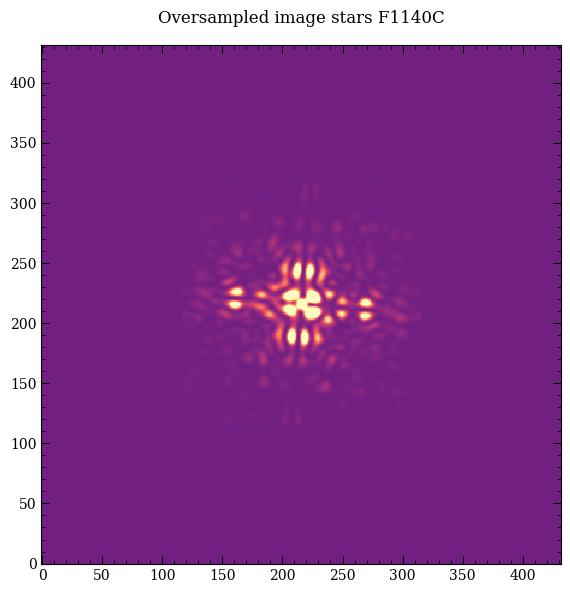

In [20]:
# Print the results
if star_A_Q or star_B_Q or star_C_Q:
    fig, ax = plt.subplots(1,1)
    fig.suptitle('Oversampled image stars '+filt)
    # extent = 0.5 * np.array([-1,1,-1,1]) * inst.fov_pix * inst.pixelscale
    ax.imshow(hdul_full[0].data, vmin=-0.5,vmax=1, cmap='magma') #, extent=extent, cmap='magma',
    # ax.set_xlabel('Arcsec')
    # ax.set_ylabel('Arcsec')
    # ax.tick_params(axis='both', color='white', which='both')
    # for k in ax.spines.keys():
    #     ax.spines[k].set_color('white')
    # ax.xaxis.get_major_locator().set_params(nbins=9, steps=[1, 2, 5, 10])
    # ax.yaxis.get_major_locator().set_params(nbins=9, steps=[1, 2, 5, 10])
    fig.tight_layout()


In [21]:
### PSF Grid
# Create grid locations for array of PSFs to generate
apname = inst.psf_coeff_header['APERNAME']
siaf_ap = inst.siaf[apname]

field_rot = 0 if inst._rotation is None else inst._rotation

xyoff_half = 10**(np.linspace(-2,1,10))
xoff = yoff = np.concatenate([-1*xyoff_half[::-1],[0],xyoff_half])

# Mask Offset grid positions in arcsec
xgrid_off, ygrid_off = np.meshgrid(xoff, yoff)
xgrid_off, ygrid_off = xgrid_off.flatten(), ygrid_off.flatten()

# Science positions in detector pixels
xoff_sci_asec, yoff_sci_asec = coords.xy_rot(-1*xgrid_off, -1*ygrid_off, -1*field_rot)
xgrid = xoff_sci_asec / siaf_ap.XSciScale + siaf_ap.XSciRef
ygrid = yoff_sci_asec / siaf_ap.YSciScale + siaf_ap.YSciRef


In [24]:
%%time

# Now, create all PSFs, one for each (xgrid, ygrid) location
# Only need to do this once. Can be used for multiple dither positions.
setup_logging(level='WARN', verbose=False)
hdul_psfs = inst.calc_psf_from_coeff(coord_vals=(xgrid, ygrid), coord_frame='sci', return_oversample=True)

print('Number of PSFs: {}'.format(len(hdul_psfs)))
print('PSF shape: {}'.format(hdul_psfs[0].data.shape))

PSFs:   0%|          | 0/441 [00:00<?, ?it/s]

Number of PSFs: 441
PSF shape: (200, 200)
CPU times: user 55.9 s, sys: 886 ms, total: 56.8 s
Wall time: 4.75 s


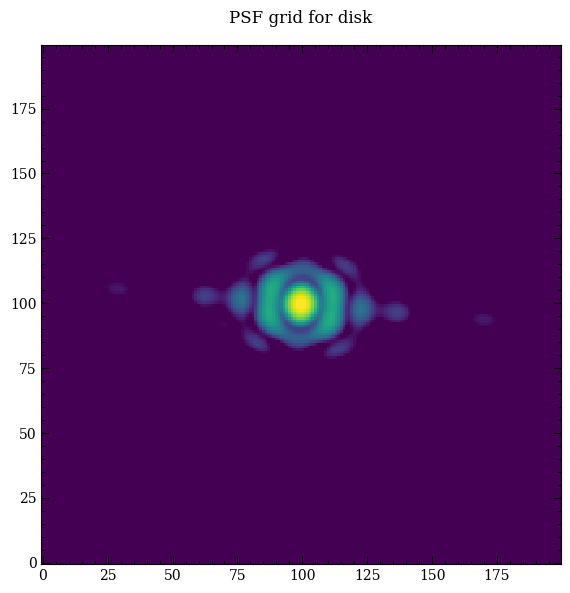

In [27]:
from matplotlib.colors import LogNorm

psf_grid_summed = np.empty(hdul_psfs[0].data.shape)
for i in range(len(hdul_psfs)):
    data = hdul_psfs[i].data 
    data[data<0] = 0
    psf_grid_summed += data

fig1, ax1 = plt.subplots(1,1)
fig1.suptitle('PSF grid for disk')
# extent = 0.5 * np.array([-1,1,-1,1]) * inst.fov_pix * inst.pixelscale
ax1.imshow(psf_grid_summed/len(hdul_psfs) , norm=LogNorm(vmin=0.00001,vmax=0.001))
fig1.tight_layout()


Input disk model shape: (39, 39)


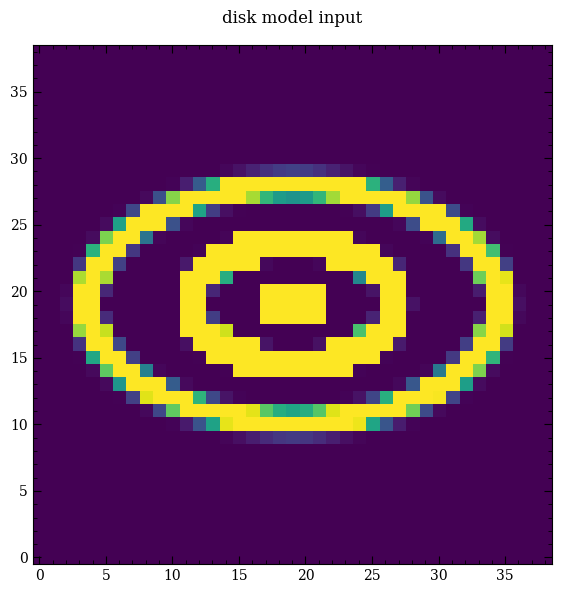

In [29]:
##########################  Disk Model Image
# Open model and rebin to PSF sampling
# Scale to instrument wavelength assuming grey scattering function
# Converts to phot/sec/lambda
hdul_disk_model = image_manip.make_disk_image(inst, disk_params, sp_star=star_A_params['sp'])
print('Input disk model shape: {}'.format(hdul_disk_model[0].data.shape))

fig1, ax1 = plt.subplots(1,1)
fig1.suptitle('disk model input')
ax1.imshow(hdul_disk_model[0].data, vmin=0,vmax=20)
fig1.tight_layout()

In [30]:
# Rotation necessary to go from sky coordinates to 'idl' frame
rotate_to_idl = -1*(tel_point.siaf_ap_obs.V3IdlYAngle + tel_point.pos_ang)

In [32]:
### Dither position
# Select the first dither location offset
delx, dely = tel_point.position_offsets_act[0]
#hdul_out = image_manip.rotate_shift_image(hdul_disk_model, PA_offset=rotate_to_idl,
#                                          delx_asec=delx, dely_asec=dely)

### Modification by Elodie: Warrning message then crash: PA_offset deprecated, replace by angle instead
hdul_out = image_manip.rotate_shift_image(hdul_disk_model, angle=rotate_to_idl,
                                          delx_asec=delx, dely_asec=dely)

In [38]:
# Distort image on 'sci' coordinate grid
im_sci, xsci_im, ysci_im = image_manip.distort_image(hdul_out, ext=0, to_frame='sci', return_coords=True)

# Distort image onto 'tel' (V2, V3) coordinate grid for plot illustration
im_tel, v2_im, v3_im = image_manip.distort_image(hdul_out, ext=0, to_frame='tel', return_coords=True)

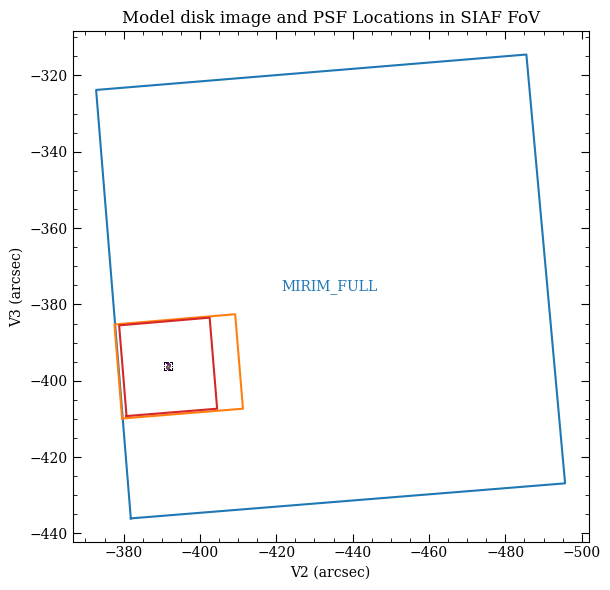

In [42]:
# Plot locations for PSFs that we will generate
fig, ax = plt.subplots(1,1)

# Show image in V2/V3 plane
extent = [v2_im.min(), v2_im.max(), v3_im.min(), v3_im.max()]
ax.imshow(im_tel**0.1, extent=extent, cmap='magma')

# Add on SIAF aperture boundaries
tel_point.plot_inst_apertures(ax=ax, clear=False, label=True)
tel_point.plot_ref_aperture(ax=ax)
tel_point.plot_obs_aperture(ax=ax, color='C3')

# Add PSF location points
v2, v3 = siaf_ap.convert(xsci, ysci, 'sci', 'tel')
ax.scatter(v2, v3, marker='.', alpha=0.5, color='C2', edgecolors='none', linewidths=0)

ax.set_title('Model disk image and PSF Locations in SIAF FoV')

fig.tight_layout()

In [43]:
# If the image is too large, then this process will eat up much of your computer's RAM
# So, crop image to more reasonable size (20% oversized)
xysize = int(1.2 * np.max([siaf_ap.XSciSize,siaf_ap.YSciSize]) * osamp)
xy_add = osamp - np.mod(xysize, osamp)
xysize += xy_add

im_sci = pad_or_cut_to_size(im_sci, xysize)
hdul_disk_model_sci = fits.HDUList(fits.PrimaryHDU(data=im_sci, header=hdul_out[0].header))
print('Resized disk model shape: {}'.format(im_sci.shape))

Resized disk model shape: (520, 520)


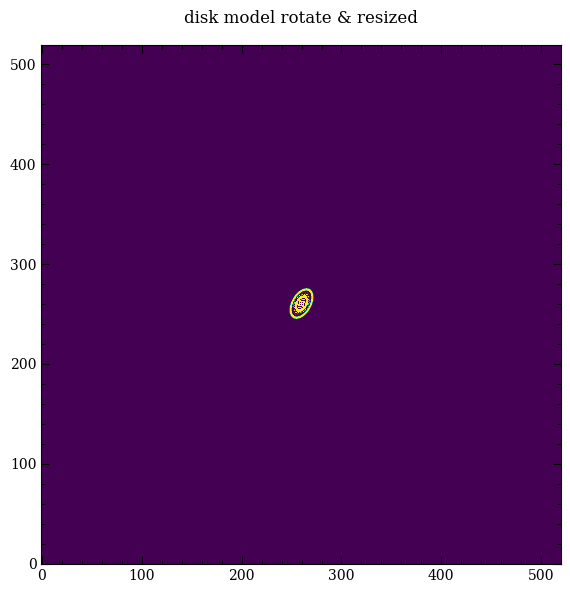

In [44]:
fig1, ax1 = plt.subplots(1,1)
fig1.suptitle('disk model rotate & resized')
ax1.imshow(im_sci, vmin=0,vmax=20)
fig1.tight_layout()
plt.show()

In [46]:
hdul_disk_model_sci[0].header['CFRAME'] = 'sci'

In [47]:
# Convolve image
im_conv = image_manip.convolve_image(hdul_disk_model_sci, hdul_psfs)

Convolution:   0%|          | 0/441 [00:00<?, ?it/s]

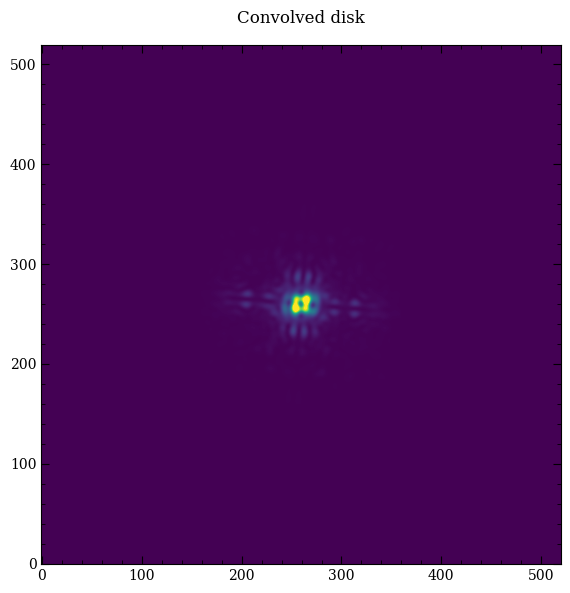

In [48]:
fig1, ax1 = plt.subplots(1,1)
fig1.suptitle('Convolved disk')
ax1.imshow(im_conv, vmin=0,vmax=20)
fig1.tight_layout()

In [49]:
# Add cropped image to final oversampled image
im_conv = pad_or_cut_to_size(im_conv, shape_new)
if star_A_Q or star_B_Q or star_C_Q:
    hdul_full[0].data += im_conv
else:
    hdul_full = fits.HDUList(fits.PrimaryHDU(data=im_conv, header=hdul_disk_model_sci[0].header))
print('Resized Convolved disk shape: {}'.format(im_conv.shape)) #432x432


Resized Convolved disk shape: (432, 432)


In [50]:
# Rebin science data to detector pixels
im_sci = image_manip.frebin(hdul_full[0].data, scale=1/osamp)
print('Detector sampled final image shape: {}'.format(im_sci.shape)) #216x216


Detector sampled final image shape: (216, 216)
